### 함수(Function)
* 특정 작업을 수행하기 위해 작성된 하나의 작업 수행 단위
* 여러번 호출되어 사용될 수 있음

In [ ]:
def 함수이름(매개변수1, 매개변수2, ...):
    수행문
    .
    .
    .
    return 반환값1, 반환값2, ...

입력 매개변수와 반환값은 0개부터 n개까지 자유롭게 설정할 수 있으나, 함수 호출(사용) 시 설정한 개수에 맞춰서 사용해야 함

In [1]:
def print_hello():
    print('hello')

def print_str(str_a):
    print(str_a)
    
def return_str():
    return 'hello'
    
def return_sum(a, b):
    return a + b

In [2]:
print_hello()

print_str('Hello, World!')

print(return_str())

print(return_sum(3, 5))

hello
Hello, World!
hello
8


In [3]:
def print_args(a, b):
    print('a: ', a, ', b: ', b)

print_args(3, 5) # 매개변수는 순서대로 전달됨
print_args(b = 10, a = 0) # 이름을 지정할 경우 순서를 무시할 수 있음
print_args(0, b = 10)

a:  3 , b:  5
a:  0 , b:  10
a:  0 , b:  10


In [4]:
# 함수가 반환하는 값이 여러 개인 경우 tuple로 묶어서 반환함
def return_multiple():
    return 1, 2, 3, 4, 5

return_value = return_multiple()
print(type(return_value), return_value)

<class 'tuple'> (1, 2, 3, 4, 5)


In [10]:
# 입력 매개변수 값을 default로 설정할 수 있음
def print_sum(a=5, b=10):
    return a + b

print(print_sum(10, 13))
print(print_sum(100, 200))

23
300


In [15]:
# 매개변수 개수를 정하지않고 함수를 선언할 수 있음 1
def return_sum(*args): # arguments
    print(type(args), args) # *변수명 은 튜플 형태로 입력됨
    result = 0
    for value in args:
        print(value)
        result += value
    return result

print(return_sum(1, 2, 3))
print(return_sum(1, 2, 3, 4, 5, 6, 7))

<class 'tuple'> (1, 2, 3)
None
<class 'tuple'> (1, 2, 3, 4, 5, 6, 7)
None


In [14]:
# 매개변수 개수를 정하지않고 함수를 선언할 수 있음 2
def print_kwargs(**kwargs): # keyword arguments
    print(kwargs['name'])
#     for key, value in kwargs.items(): # dict 형태로 받아옴
#         print(key, value)
    
# print_kwargs(a = 1)
# print('----')
print_kwargs(name = 'Kim', age = 12)

Kim


#### 전역변수(global)와 지역변수(local)
* 전역변수: 모든 위치에서 접근할 수 있는 변수
* 지역변수: 함수나 클래스 등 내부에서 선언된 변수. 해당 함수나 클래스 외에서는 접근할 수 없음
   
   
   
   
* 지역변수 선언 시 global 키워드를 사용하면 전역변수로 사용할 수 있음
* 전역변수는 값이 변경되는 것을 파악하기 어려워 잘 사용되지 않음
* 보통 매개변수와 반환값으로 값을 전달, 관리함

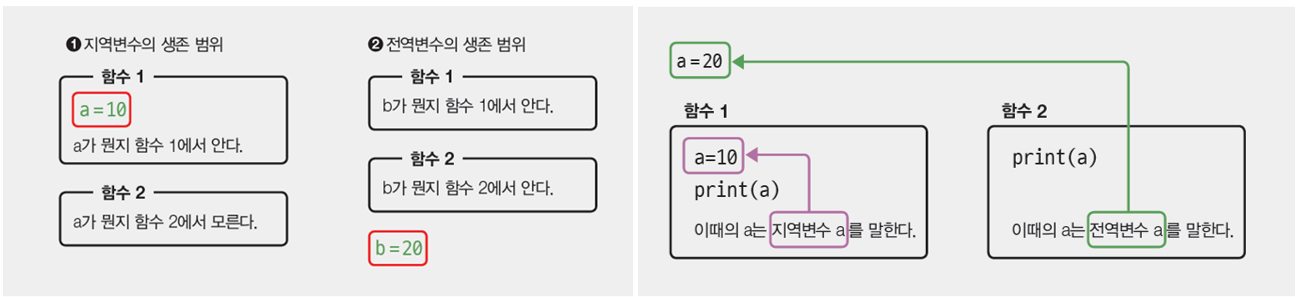

### call by object reference
* 함수 파라미터로 전달된 리스트, 세트, 딕셔너리 등 mutable object는 원본 값이 변경될 수 있어 주의해야 함

In [22]:
# 숫자, 문자는 함수에서 바뀐 값이 외부까지 반영되지 않음
def change(value):
    value = 3

x = 10
print('함수 호출 전: ', x)
change(x)
print('함수 호출 후: ', x)

함수 호출 전:  10
함수 호출 후:  10


In [24]:
# 숫자, 문자는 함수에서 바뀐 값이 외부까지 반영되지 않음
def change(value):
    value = value.replace('a', 'A')

x = 'apple'
print('함수 호출 전: ', x)
change(x)
print('함수 호출 후: ', x)

함수 호출 전:  apple
Apple
함수 호출 후:  apple


In [25]:
# 리스트, 세트, 딕셔너리는 함수 내 변화가 원본까지 영향을 줄 수 있음
# (call by referece와 유사)
def change(value):
    value.append(10)]

x = [1, 2, 3, 4, 5]
print('함수 호출 전: ', x)
change(x)
print('함수 호출 후: ', x)

함수 호출 전:  [1, 2, 3, 4, 5]
함수 호출 후:  [1, 2, 3, 4, 5, 10]


In [26]:
def change(value):
    value.add(10)

x = {1, 2, 3, 4, 5}
print('함수 호출 전: ', x)
change(x)
print('함수 호출 후: ', x)

함수 호출 전:  {1, 2, 3, 4, 5}
함수 호출 후:  {1, 2, 3, 4, 5, 10}


In [27]:
def change(value):
    value[3] = 'candy'

x = {1: 'apple', 2: 'banana'}
print('함수 호출 전: ', x)
change(x)
print('함수 호출 후: ', x)

함수 호출 전:  {1: 'apple', 2: 'banana'}
함수 호출 후:  {1: 'apple', 2: 'banana', 3: 'candy'}


In [28]:
# 파라미터로 들어온 값을 읽는 용도로만 사용하거나,
# 호출 시 copy()를 사용하는 것으로 해결할 수 있음
def change(value):
    value.append(10)

x = [1, 2, 3, 4, 5]
print('함수 호출 전: ', x)
change(x.copy())
print('함수 호출 후: ', x)

함수 호출 전:  [1, 2, 3, 4, 5]
함수 호출 후:  [1, 2, 3, 4, 5]


### 클래스(class)
* 객체 지향 프로그래밍의 주된 특징으로 사용되고 있음
* 속성(변수)과 행위(함수)를 포함하는 객체 단위

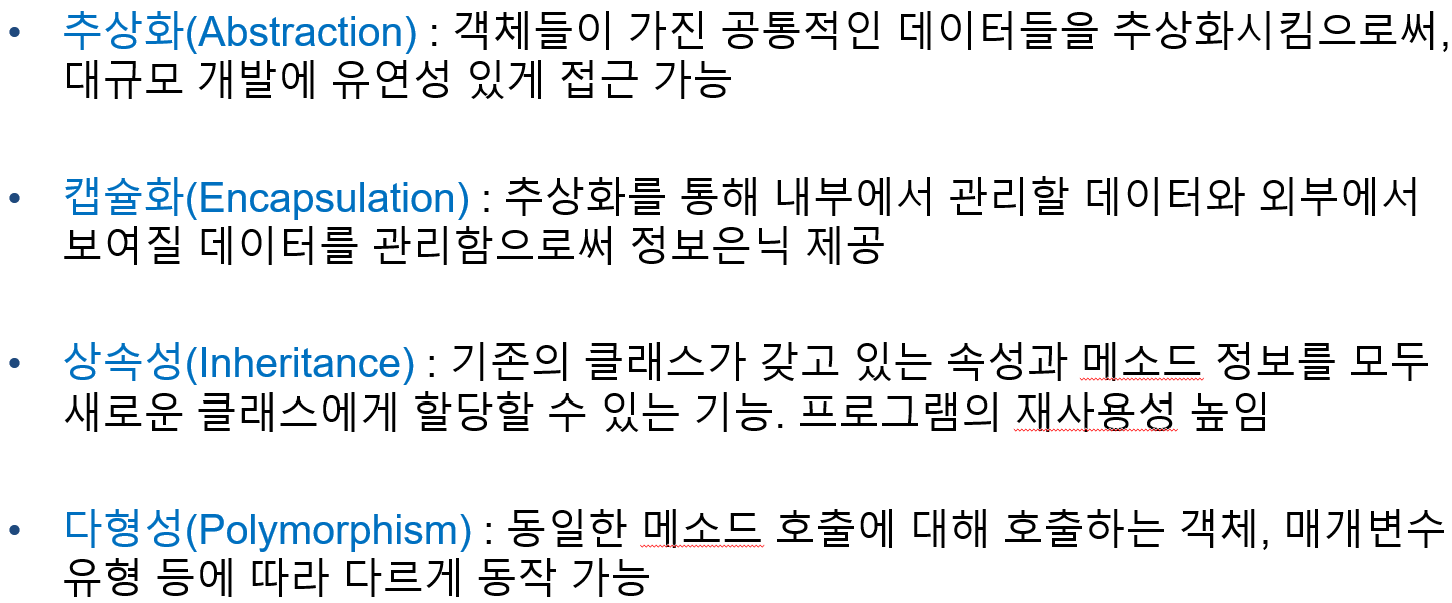

In [32]:
class Car:
    # 클래스의 속성(attribute, field)
    color = ''
    speed = 0
    
    # 클래스의 행위(fucntion, method)
    # instance method
    # 함수의 첫 인자로 반드시 self가 들어가야 함
    # self: 인스턴스 자기 자신을 가리킴
    def up_speed(self, value):
        self.speed += value
        
    def down_speed(self, value):
        self.speed -= value

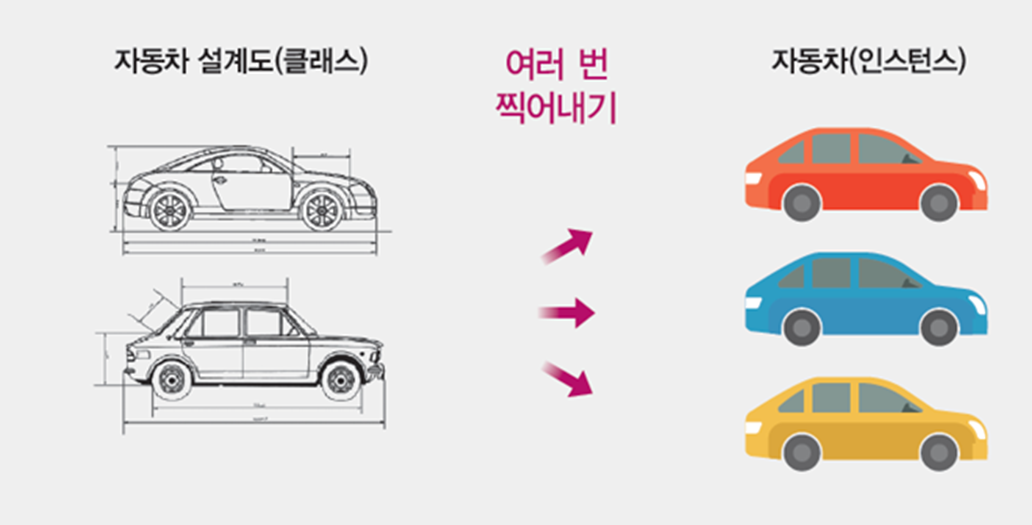

In [34]:
# 클래스 인스턴스 생성
car1 = Car()
car2 = Car()
car3 = Car()

print(car1)
print(car1 != car2)

True


In [35]:
# 클래스 필드 및 메소드 사용
car1.color = 'red'
car2.color = 'blue'
car3.color = 'yellow'

car1.up_speed(20)
print(f'Car 1 has {car1.color} color, and {car1.speed} speed')

Car 1 has red color, and 20 speed


#### 생성자(constructor)
* __init__ 이름을 가지는 함수 형태
* 인스턴스 생성 시점 1회 호출되며 주로 초기 설정을 위해 사용

In [36]:
class Car:
    # 클래스 생성자(constructor) 사용
    def __init__(self):
        self.color = ''
        self.speed = 0
    
    def up_speed(self, value):
        self.speed += value
        
    def down_speed(self, value):
        self.speed -= value

In [37]:
# 클래스 인스턴스 생성
car1 = Car()

# 클래스 필드 및 메소드 사용
car1.color = 'red'
car1.up_speed(20)
print(f'Car 1 has {car1.color} color, and {car1.speed} speed')

Car 1 has red color, and 20 speed


In [42]:
class Car:
    # 필드값을 초기화하기 위해 사용할 수 있음
    def __init__(self, val_color, val_speed):
        self.color = val_color
        self.speed = val_speed
    
    def up_speed(self, value):
        self.speed += value
        
    def down_speed(self, value):
        self.speed -= value

In [43]:
# 클래스 인스턴스 생성
car1 = Car('red', 0)
# print(car1.color, car1.speed)

# 클래스 필드 및 메소드 사용
car1.up_speed(20)
print(f'Car 1 has {car1.color} color, and {car1.speed} speed')

Car 1 has red color, and 10 speed


#### 인스턴스 변수와 클래스 변수

In [45]:
class Car:
    count = 0
    
    def __init__(self, val_color, val_speed):
        # 인스턴스 변수: self를 사용하여 호출. 각 인스턴스에서만 사용됨
        self.color = val_color
        self.speed = val_speed
        
        # 클래스 변수: 클래스명을 사용하여 호출. 해당 클래스로 만든 모든 인스턴스가 값을 공유함 
        Car.count += 1
    
    def up_speed(self, value):
        self.speed += value
        
    def down_speed(self, value):
        self.speed -= value

In [46]:
car1 = Car('red', 0)
car2 = Car('blue', 0)
car3 = Car('yellow', 0)

# 인스턴스가 값을 공유함
print(car1.count)
print(car3.count)

3
3


#### 클래스(class) 메소드와 정적(static) 메소드

In [ ]:
class Test:
    # 클래스메소드: @classmethod 키워드 사용
    # 매게변수 cls를 반드시 넣어야 함
    # cls는 본 클래스를 가리킴 (즉, 여기서는 Test)
    @classmethod
    def plus_cls(cls, a, b):
        return a + b
    
    # 클래스 객체를 반환하는데 사용할 수 있음
    @classmethod
    def return_new_class(cls):
        return cls()
    
    # 정적메소드: @staticmethod 키워드 사용
    # 매개변수 cls, self를 사용하지 않으므로 필드 변수를 사용할 수 없음
    # 주로 유틸리티성 클래스를 위해 사용됨
    @staticmethod
    def plus_static(a, b):
        return a + b
    

# 인스턴스를 선언할 필요없이, 클래스를 이용해 바로 호출할 수 있음
print(Test.plus_cls(1, 2))
print(Test.plus_static(1, 2))

test = Test()
print(test.plus_cls(10, 20))
print(test.plus_static(10, 20))

In [47]:
class Cal:
    @staticmethod
    def plus(a, b):
        return a + b
    
    @staticmethod
    def minus(a, b):
        return a - b
    
    @staticmethod
    def multiply(a, b):
        return a * b
    
    @staticmethod
    def divide(a, b):
        return a / b

print(Cal.plus(10, 20))

30


#### getter와 setter
* 파이썬에서 클래스 내 변수와 메소드는 기본적으로 public
* 파이썬은 클래스 내에서 private 변수와 메소드를 선언하기 위해서 언더바 기호(__)를 사용함
* getter, setter 기능을 하는 함수는 데코레이터를 이용하여 선언

In [50]:
class Test():
    def __init__(self):
        # _변수명: 클래스 내부에서 사용하는 함수임을 표시하기 위해 사용. 실질 효과는 없음
        # __변수명: 클래스 외부에서 접근할 수 없도록 함
        self._a = 10
        self.__b = 20
    
    def __m(self):
        return 0

test = Test()
print(test._a) # 접근 가능
print(test.__b) # 접근 불가능. error
print(test.__m()) # 접근 불가능. error

AttributeError: 'Test' object has no attribute '__m'

In [52]:
class Test:
    def __init__(self, value):
        self.__a = value
    
    @property # getter 역활. 변수의 값을 외부에서 확인할 수 있게 함
    def a(self):
        value = self.__a * 10 - 3
        return value
    
    @a.setter # setter 역활. 변수의 값을 외부에서 변경할 수 있게 함
    def a(self, value):
        if value < 0:
            value = 0
        self.__a = value

test = Test(100)
# test.a = -10
print(test.a)

997


#### 상속(inheritance)
* 어떤 클래스의 변수와 메소드를 받아, 새로운 클래스를 선언하는 것
* 기존 클래스를 변형시키지 않고,  사용자의 목적에 맞도록 커스텀할 수 있음
* 상위클래스: 슈퍼 클래스, 부모 클래스
* 하위클래스: 서브 클래스, 자식 클래스

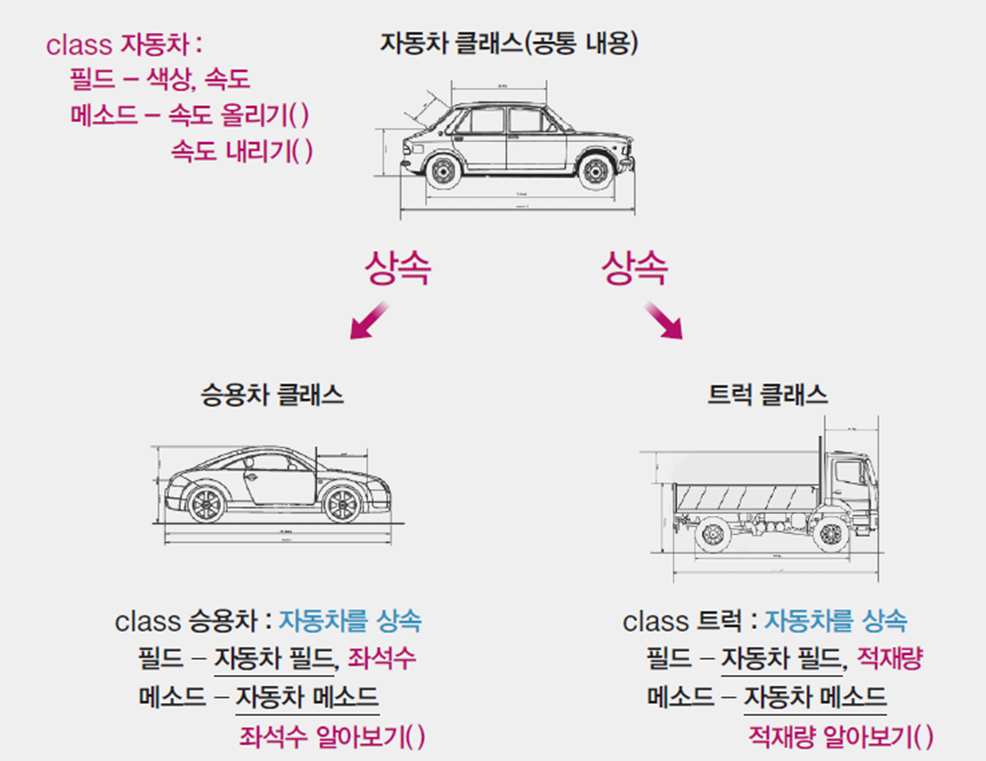

In [55]:
class Car:
    def __init__(self, val_color):
        self.color = val_color
        self.speed = 0
    
    def up_speed(self, value):
        self.speed += value
        
    def down_speed(self, value):
        self.speed -= value
        
class Sedan(Car):
    def __init__(self, val_color, val_seat_num):
        super().__init__(val_color)
        self.seat_num = val_seat_num
        
    def up_speed(self, value):
        self.speed += (value - 10)
    
    def get_seatnum(self):
        return self.seat_num
    
class Truck(Car):
    def __init__(self, val_color, val_capa):
        super().__init__(val_color)
        self.capacity = val_capa
    
    def get_capa(self):
        return self.capacity

In [56]:
# 자식 클래스에 대한 인스턴스 생성
sedan1 = Sedan('red', 5)
truck1 = Truck('blue', 50)

# 부모 클래스에 선언된 내용을 사용할 수 있음
sedan1.up_speed(80)

print(f'sedan color: {sedan1.color}, speed: {sedan1.speed}, seat_num: {sedan1.seat_num}')

sedan color: red, speed: 70, seat_num: 5


### 자료형 확인

In [58]:
x = 100
print(type(x))

<class 'int'>


In [59]:
x = 100
if str(type(x)) == "<class 'int'>":
    print('x는 정수입니다.')

x는 정수입니다.


In [60]:
x = 100
if type(x) is int:
    print('x는 정수입니다.')

x는 정수입니다.


In [61]:
x = 100
if isinstance(x, int):
    print('x는 정수입니다.')

x는 정수입니다.


In [66]:
class test:
    a = 'test'
    def func1(self):
        return 'parent'

class student(test):
    def func2(self):
        return 'child'
    
a = test()
b = student()

print(isinstance(b, test))
print(type(b) is test)
print(isinstance(b, student))
print(type(b) is student)

True
False
True
True
